In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


/home/pirl/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("HMEQ.csv", engine='python')
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [3]:
df['JOB'].fillna('Other', inplace=True)
df.fillna(df.mean(), inplace=True)

In [4]:
df_dummy = pd.get_dummies(df)
df_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808717,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [5]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis=1, inplace=False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (2623, 18)
train data Y size :  (2623,)
test data X size :  (1125, 18)
test data Y size :  (1125, 18)


In [7]:
knn_uncusomized = KNeighborsClassifier()
knn_uncusomized.fit(df_train_x, df_train_y);

print("Accuracy on training set ", knn_uncusomized.score(df_train_x, df_train_y))
print("Accuracy on test set ", knn_uncusomized.score(df_test_x, df_test_y))

Accuracy on training set  0.9161265726267632
Accuracy on test set  0.9075555555555556


In [8]:
train_accuracy = []
test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]
for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainScore"] = train_accuracy
df_accuracy_neighbors["TestScore"] = test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


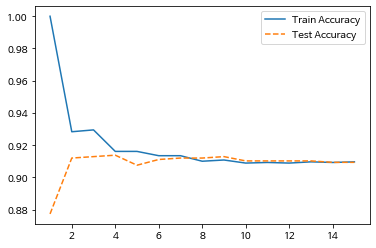

In [9]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [11]:
train_accuracy = []
test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (['uniform']) * 10 + (['distance']*10)

for(v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights']=para_weights
df_accuracy_weights['TrainAccuracy']=train_accuracy
df_accuracy_weights['TestAccuracy']=test_accuracy
df_accuracy_weights.round(3)



,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [13]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns='Weights',
                                                     values=['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000000,0.877333
1,2,uniform,0.928326,0.912000
2,3,uniform,0.929470,0.912889
3,4,uniform,0.916127,0.913778
4,5,uniform,0.916127,0.907556
5,6,uniform,0.913458,0.911111
6,7,uniform,0.913458,0.912000
7,8,uniform,0.910027,0.912000
8,9,uniform,0.910789,0.912889
9,10,uniform,0.908883,0.910222


In [14]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.877333,0.877333
2,1.0,0.928326,0.877333,0.912000
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556


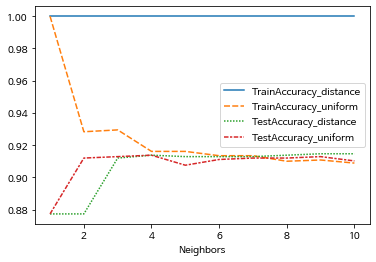

In [17]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [20]:
train_accuracy = []
test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 3
para_metric = ['minkowski'] * 10 + ['euclidean']*10 + ['manhattan']*10


for(v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights='uniform', metric=v_metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric['TestAccuracy']=test_accuracy
df_accuracy_metric.round(3)



,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


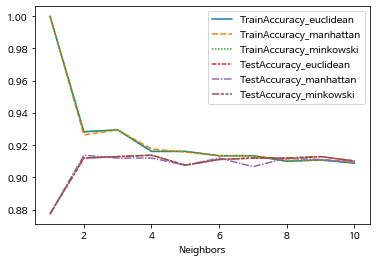

In [21]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns='Metric',
                                                     values=['TrainAccuracy', 'TestAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [23]:
knn_final = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean')
knn_final.fit(df_train_x, df_train_y)
y_pred = knn_final.predict(df_test_x)

print("Accuracy on training set :", knn_final.score(df_train_x, df_train_y))
print("Accuracy on test set :", knn_final.score(df_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))



Accuracy on training set : 0.9161265726267632
Accuracy on test set : 0.9137777777777778
Confusion matrix:
 [[1018    3]
 [  94   10]]
